<a href="https://colab.research.google.com/github/AlexanderPiavis/GSB544/blob/main/Practice_Activity_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here

In [1]:
import pandas as pd
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


Make a new

In [11]:
ha["sex"] = ha["sex"].astype("category")
ha["cp"] = ha["cp"].astype("category")
ha["restecg"] = ha["restecg"].astype("category")
ha["output"] = ha["output"].astype("category")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1
ha["cp"] = ha["cp"].astype("str")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
270,45,1,3,110,264,1,132,0,1,0,0,0
271,68,1,0,144,193,1,141,0,0,0,0,1


In [4]:
X_train = ha[["age", "sex", "output", "trtbps", "chol", "restecg", "thalach"]]
y_train = ha["cp"]

In [7]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=["category"])),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [12]:
pipelineKNN = Pipeline(
  [("preprocessing", ct),
  ("KNN_classifier", KNeighborsClassifier(n_neighbors = 35))]
)
scores = cross_val_score(pipelineKNN, X_train, y_train, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.534882154882155)

In [14]:
tree_pipeline =Pipeline(
    [("preprocessing", ct),
    ("tree_classifier", DecisionTreeClassifier(max_depth=2))]
)

tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b99e5b30560>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b99e6b33cb0>)])),
                ('tree_classifier', DecisionTreeClassifier(max_depth=2))])

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.25, 0.5, 'x[8] <= 0.645\ngini = 0.691\nsamples = 146\nvalue = [34, 36, 63, 13]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.674\nsamples = 122\nvalue = [31, 34, 52, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.656\nsamples = 24\nvalue = [3, 2, 11, 8]'),
 Text(0.75, 0.5, 'x[10] <= -0.213\ngini = 0.425\nsamples = 127\nvalue = [94, 8, 18, 7]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.283\nsamples = 75\nvalue = [63, 3, 7, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.581\nsamples = 52\nvalue = [31, 5, 11, 5]')]

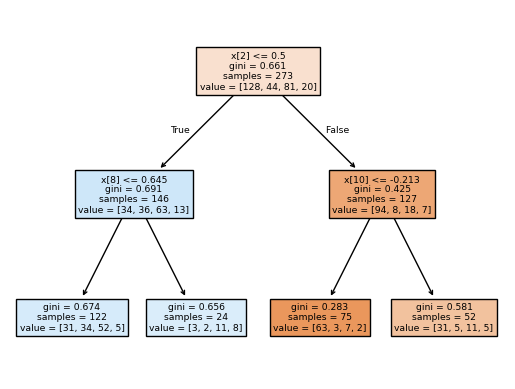

In [18]:
from sklearn.tree import plot_tree
plot_tree(tree_pipeline.named_steps["tree_classifier"], filled=True)

This first split is trying to separate the population by distinguishing between subjects that are high risk and subjects that are not. It is the most important predictor.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

Make a new variable that is cp_is_3 and then go on from there

In [23]:
y3 = ha["cp_is_3"]
y2 = ha["cp_is_2"]
y1 = ha["cp_is_1"]
y0 = ha["cp_is_0"]

logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X_train, y3)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [22]:
cross_val_score(logistic_model, X_train, y3, cv=5, scoring="f1").mean()

np.float64(0.0)

In [24]:
cross_val_score(logistic_model, X_train, y2, cv=5, scoring="f1").mean()

np.float64(0.1393939393939394)

In [25]:
cross_val_score(logistic_model, X_train, y1, cv=5, scoring="f1").mean()

np.float64(0.0)

In [26]:
cross_val_score(logistic_model, X_train, y0, cv=5, scoring="f1").mean()

np.float64(0.6525962644949986)

Based on F1 score, the best model is the one with the target of cp_is_0

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [30]:
ha_01 = ha[(ha["cp"] == "0") | (ha["cp"] == "1")]
ha_02 = ha[(ha["cp"] == "0") | (ha["cp"] == "2")]
ha_03 = ha[(ha["cp"] == "0") | (ha["cp"] == "3")]

y01 = ha_01["cp"]
X01 = ha_01[["age", "sex", "output", "trtbps", "chol", "restecg", "thalach"]]
y02 = ha_02["cp"]
X02 = ha_02[["age", "sex", "output", "trtbps", "chol", "restecg", "thalach"]]
y03 = ha_03["cp"]
X03 = ha_03[["age", "sex", "output", "trtbps", "chol", "restecg", "thalach"]]

logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X01, y01)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [29]:
cross_val_score(logistic_model, X01, y01, cv=5, scoring="roc_auc").mean()

np.float64(0.8376709401709401)

In [31]:
cross_val_score(logistic_model, X02, y02, cv=5, scoring="roc_auc").mean()

np.float64(0.7511029411764706)

In [32]:
cross_val_score(logistic_model, X03, y03, cv=5, scoring="roc_auc").mean()

np.float64(0.7412307692307692)

The best pair that the OvO approach was best at distinguishing was the 0/1 pair.